<a href="https://colab.research.google.com/github/prlhspt/Coursera-machine-Learning/blob/master/digit_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
from sklearn.datasets import load_digits

import pandas as pd

digits = load_digits()

import numpy as np

import pandas as pd

import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Dropout


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [12]:
from sklearn.model_selection import train_test_split
Y_encoded = tf.keras.utils.to_categorical(Y)
Y_encoded[0], Y_encoded[50], Y_encoded[100]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32))

In [141]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)
X = digits.data
Y = digits.target

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=2020)
# 모델 설정
model = Sequential([
    Dense(128, input_dim=64, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
]) 
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 128)               8320      
_________________________________________________________________
dropout_72 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_134 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_73 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_135 (Dense)            (None, 10)                170       
Total params: 10,554
Trainable params: 10,554
Non-trainable params: 0
_________________________________________________________________


In [143]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model_test/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "final{epoch:03d}-{val_loss:.4f}.hdf5"
checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
# 모델 컴파일 

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=500)

# 모델 실행 및 저장
history = model.fit(X_train, y_train, validation_split=0.2, epochs=3500, batch_size=100
                    ,verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 2.24316, saving model to ./model_test/final001-2.2432.hdf5

Epoch 00002: val_loss did not improve from 2.24316

Epoch 00003: val_loss did not improve from 2.24316

Epoch 00004: val_loss did not improve from 2.24316

Epoch 00005: val_loss did not improve from 2.24316

Epoch 00006: val_loss did not improve from 2.24316

Epoch 00007: val_loss did not improve from 2.24316

Epoch 00008: val_loss did not improve from 2.24316

Epoch 00009: val_loss did not improve from 2.24316

Epoch 00010: val_loss did not improve from 2.24316

Epoch 00011: val_loss did not improve from 2.24316

Epoch 00012: val_loss did not improve from 2.24316

Epoch 00013: val_loss improved from 2.24316 to 2.21538, saving model to ./model_test/final013-2.2154.hdf5

Epoch 00014: val_loss improved from 2.21538 to 2.17039, saving model to ./model_test/final014-2.1704.hdf5

Epoch 00015: val_loss improved from 2.17039 to 2.13118, saving model to ./model_test/final015-2.1312.hdf5

Epo

In [144]:
# 결과 출력 
print("\n Accuracy: %.4f" % (model.evaluate(X_test, y_test, verbose=2)[1]))

12/12 - 0s - loss: 0.1439 - accuracy: 0.9833

 Accuracy: 0.9833


In [107]:
#from tensorflow.keras.models import load_model
model = load_model('./model_test/final758-0.1650.hdf5')

In [108]:
# 결과 출력 
print("\n Accuracy: %.4f" % (model.evaluate(X_test, y_test, verbose=2)[1]))

12/12 - 0s - loss: 0.1896 - accuracy: 0.9667

 Accuracy: 0.9667


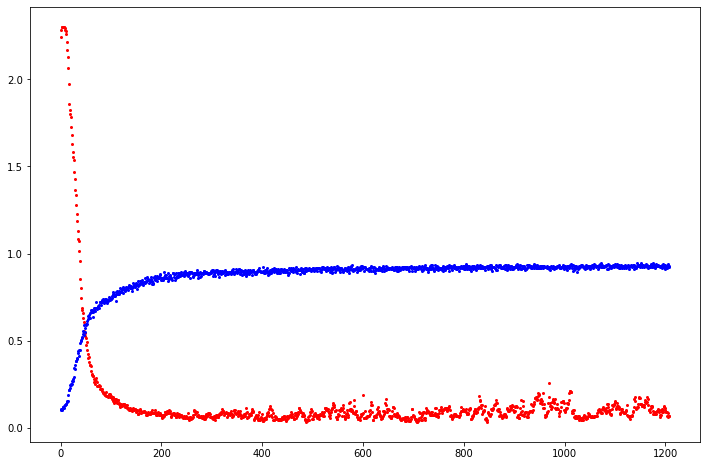

In [147]:
import matplotlib.pyplot as plt
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장

y_vloss=history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장

y_acc=history.history['accuracy']

# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시

x_len = np.arange(len(y_acc))

plt.figure(figsize=(12,8))

plt.plot(x_len, y_vloss, "o", c="red", markersize=2)

plt.plot(x_len, y_acc, "o", c="blue", markersize=2)

plt.show()

